# Data generation of Path Dependent Representative Volume Elements(RVEs)

## 1. Illustration of RVE 
RVE simulation is an effective approach to explore constitutive laws of composites. Generally, An RVE has two material Phases which are matrix phase and fiber phase.  Figure 1 gives an illustration of micro-structure of a 2D RVE. 


<center><img src="figures/tasks_rve.svg" width="=80%"> </center>
<center> Figure 1: Illustration of RVEs, and list of commonalities and discrepancies on setting up tasks </center>
<br>

---
According to [Bessa et al.](https://www.sciencedirect.com/science/article/pii/S0045782516314803), **microstructures**, **material properties**, and **loading conditions** are three major variables which will influence the RVE properties. In order to exploit the advantages and limits of CDDM, several RVEs with similarities and differences are set up as different tasks. In detail, different tasks have different microstructures and material properties and apply the same dependent paths to generate the learning dataset

## 2. Tasks set up
From Figure 1, it can be seen that the microstructure of an RVE is controlled by four factors which are size of the square, volume fraction of fiber phase, and distribution parameters for generating fibers. Meanwhile, the material properties of fiber and matrix phases also influence the performance of RVEs significantly. 
<br>
Therefore, several designated microstructures and material properties are given as the design variables for generating different tasks. 

### 2.1 Design variables



#### 2.1.1. microstructure configurations:
>Configuration (a):  
$$v_{frac} = 0.45 , L=0.048 , R_{mu}=0.01, R_{std}=0.003$$  

>Configuration (b): 
$$v_{frac} = 0.30,  L=0.048 , R_{mu}=0.003, R_{std}=0.0$$ 

>Configuration (c): 
$$v_{frac} = 0.15,  L=0.048 , R_{mu}=0.0015, R_{std}=0.00005$$ 

Figure 2 plots different configurations of microstructure: 

<center><img src="figures/tasks_microstructures.svg" width="=80%"> </center>
<center> Figure 2: Schematics of different microstructure configurations </center>
<br>

#### 2.2.1  material properties for matrix and fiber phases 
1. matrix material property configurations
The von-Mises plasticity model is selected for matrix material. Meanwhile,  the young' modulus ($E_{matrix} =100 MPa $) and poisson ratio ($\nu = 0.3$) are fixed for all tasks, different hardening laws are designated. 

>linear:  (1) $$\sigma_{y} = 0.5+0.5\bar\epsilon$$ 
>swift:(2) $$\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$$   
>ramberg: (3) $$\sigma_{y} = 0.5(1+ \bar\epsilon)^{1/0.4}$$
> swift: (4) $$\sigma_{y} = 3+0.5(\bar\epsilon)^{0.4}$$   

2. fiber material property configurations 
The fiber material is set to be elastic, and poisson ratio are fixed to be $\nu=0.19$. Whereas, different youngs modulus are chosen.
>(I) $E_{fiber}=1$ MPa \
>(II) $E_{fiber} =10$ MPa\
>(III) $E_{fiber} =1000$ MPa

### 2.3 Design of experiments of tasks 
 In order to set up the tasks properly, meaning different tasks have similarities and dissimilarities, 4 tasks are listed in Table 1. 
<center><img src="figures/tasks_details.png" width="=100%"> </center>
<center> Table 1: Parameters configurations of different tasks  </center>
<br>

## 3. Implementation of generating simulation data of all tasks 

In [1]:
import os
import f3dasm_simulate
from pathlib import Path
from matplotlib import pyplot as plt


2023-06-22 15:41:51,097 - Imported f3dasm (version: 1.1.0)
2023-06-22 15:41:51.320957: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-22 15:41:51.367532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-22 15:41:52.243492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### 3.1 Task 1

In [2]:
# define microstucture
microstructure = f3dasm_simulate.abaqus.microstructure.CircleMicrostructure(
    size=0.048, radius_mu=0.01, radius_std=0.003, vol_req=0.45)

# materials parameters
# fiber material
fiber_material = f3dasm_simulate.abaqus.material.ElasticMaterial(youngs_modulus=10.0, poisson_ratio=0.19)
# matrix material
hardening_law = f3dasm_simulate.abaqus.material.LinearHardeningLaw(a=0.5, b=0.5, yield_stress=0.5)
matrix_material = f3dasm_simulate.abaqus.material.PlasticMaterial(
    youngs_modulus=100.0, poisson_ratio=0.30, hardening_law=hardening_law)
material = f3dasm_simulate.abaqus.material.CompositeMaterial(
    matrix_material=matrix_material, fiber_material=fiber_material)
# loading
amplitude = f3dasm_simulate.abaqus.loading.AmplitudeGenerator(num_amplitude=1, num_control=8, num_steps=100, seed=1)
loading = f3dasm_simulate.abaqus.loading.PathLoading(strain=[0.02, 0.02, 0.02], amplitude_generator=amplitude)

# put all information together
simulation_info = f3dasm_simulate.abaqus.VonMisesPlasticElasticPathLoads(
    material=material, microstructure=microstructure, loading=loading)
folder_info = f3dasm_simulate.abaqus.simulator_info.FolderInfo()
abaqus_info = f3dasm_simulate.abaqus.simulator_info.AbaqusInfo()
# initialize the simulator
simulator = f3dasm_simulate.abaqus.simulator.AbaqusSimulator(
    simulation_info=simulation_info, folder_info=folder_info, abaqus_info=abaqus_info)
results_task_A = simulator.run(main_folder=str(Path()))

/home/jiaxiangyi/Documents/f3dasm_simulate/studies/CDDM/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :105.004355 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


#### 3.2 Task B

In [3]:
# define microstucture
microstructure = f3dasm_simulate.abaqus.microstructure.CircleMicrostructure(
    size=0.048, radius_mu=0.003, radius_std=0.0, vol_req=0.3)

# materials parameters
# fiber material
fiber_material = f3dasm_simulate.abaqus.material.ElasticMaterial(youngs_modulus=1.0, poisson_ratio=0.19)
# matrix material (swift law)
hardening_law = f3dasm_simulate.abaqus.material.SwiftHardeningLaw(a=0.5, b=0.4, yield_stress=0.5)
matrix_material = f3dasm_simulate.abaqus.material.PlasticMaterial(
    youngs_modulus=100.0, poisson_ratio=0.30, hardening_law=hardening_law)
material = f3dasm_simulate.abaqus.material.CompositeMaterial(
    matrix_material=matrix_material, fiber_material=fiber_material)
# loading
amplitude = f3dasm_simulate.abaqus.loading.AmplitudeGenerator(num_amplitude=1, num_control=8, num_steps=100, seed=1)
loading = f3dasm_simulate.abaqus.loading.PathLoading(strain=[0.02, 0.02, 0.02], amplitude_generator=amplitude)

# put all information together
simulation_info = f3dasm_simulate.abaqus.VonMisesPlasticElasticPathLoads(
    material=material, microstructure=microstructure, loading=loading)
folder_info = f3dasm_simulate.abaqus.simulator_info.FolderInfo()
abaqus_info = f3dasm_simulate.abaqus.simulator_info.AbaqusInfo()
# initialize the simulator
simulator = f3dasm_simulate.abaqus.simulator.AbaqusSimulator(
    simulation_info=simulation_info, folder_info=folder_info, abaqus_info=abaqus_info)
results_task_B = simulator.run(main_folder=str(Path()))


/home/jiaxiangyi/Documents/f3dasm_simulate/studies/CDDM/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :110.002900 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


### 3.3 Task C

In [4]:
# define microstucture
microstructure = f3dasm_simulate.abaqus.microstructure.CircleMicrostructure(
    size=0.048, radius_mu=0.0015, radius_std=0.0003, vol_req=0.15)

# materials parameters
# fiber material
fiber_material = f3dasm_simulate.abaqus.material.ElasticMaterial(youngs_modulus=1000.0, poisson_ratio=0.19)
# matrix material
hardening_law = f3dasm_simulate.abaqus.material.RambergHardeningLaw(a=0.5, b=0.4, yield_stress=0.5)
matrix_material = f3dasm_simulate.abaqus.material.PlasticMaterial(
    youngs_modulus=100.0, poisson_ratio=0.30, hardening_law=hardening_law)
material = f3dasm_simulate.abaqus.material.CompositeMaterial(
    matrix_material=matrix_material, fiber_material=fiber_material)
# loading
amplitude = f3dasm_simulate.abaqus.loading.AmplitudeGenerator(num_amplitude=1, num_control=8, num_steps=100, seed=1)
loading = f3dasm_simulate.abaqus.loading.PathLoading(strain=[0.02, 0.02, 0.02], amplitude_generator=amplitude)

# put all information together
simulation_info = f3dasm_simulate.abaqus.VonMisesPlasticElasticPathLoads(
    material=material, microstructure=microstructure, loading=loading)
folder_info = f3dasm_simulate.abaqus.simulator_info.FolderInfo()
abaqus_info = f3dasm_simulate.abaqus.simulator_info.AbaqusInfo()
# initialize the simulator
simulator = f3dasm_simulate.abaqus.simulator.AbaqusSimulator(
    simulation_info=simulation_info, folder_info=folder_info, abaqus_info=abaqus_info)
results_task_C = simulator.run(main_folder=str(Path()))


/home/jiaxiangyi/Documents/f3dasm_simulate/studies/CDDM/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :90.002834 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.


### 3.4 taks D

In [5]:
# define microstucture
microstructure = f3dasm_simulate.abaqus.microstructure.CircleMicrostructure(
    size=0.048, radius_mu=0.003, radius_std=0.0, vol_req=0.3)

# materials parameters
# fiber material
fiber_material = f3dasm_simulate.abaqus.material.ElasticMaterial(youngs_modulus=1.0, poisson_ratio=0.19)
# matrix material
hardening_law = f3dasm_simulate.abaqus.material.SwiftHardeningLaw(a=0.5, b=0.4, yield_stress=3.0)
matrix_material = f3dasm_simulate.abaqus.material.PlasticMaterial(
    youngs_modulus=100.0, poisson_ratio=0.30, hardening_law=hardening_law)
material = f3dasm_simulate.abaqus.material.CompositeMaterial(
    matrix_material=matrix_material, fiber_material=fiber_material)
# loading
amplitude = f3dasm_simulate.abaqus.loading.AmplitudeGenerator(num_amplitude=1, num_control=8, num_steps=100, seed=1)
loading = f3dasm_simulate.abaqus.loading.PathLoading(strain=[0.02, 0.02, 0.02], amplitude_generator=amplitude)

# put all information together
simulation_info = f3dasm_simulate.abaqus.VonMisesPlasticElasticPathLoads(
    material=material, microstructure=microstructure, loading=loading)
folder_info = f3dasm_simulate.abaqus.simulator_info.FolderInfo()
abaqus_info = f3dasm_simulate.abaqus.simulator_info.AbaqusInfo()
# initialize the simulator
simulator = f3dasm_simulate.abaqus.simulator.AbaqusSimulator(
    simulation_info=simulation_info, folder_info=folder_info, abaqus_info=abaqus_info)
results_task_D = simulator.run(main_folder=str(Path()))

/home/jiaxiangyi/Documents/f3dasm_simulate/studies/CDDM/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<10 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :75.002288 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<11 out of 30 licenses remain available>.


In [6]:
# function for visualize the data
def plot_path_dependent(task1_results, task2_results, task3_results, task4_results):
    fig, ax = plt.subplots(2, 3, figsize=(16, 6))
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
    ax[0, 0].plot(
        task1_results["strain"][:, 0, 0], label="task 1"
    )
    ax[0, 0].plot(
        task2_results["strain"][:, 0, 0], label="task 2"
    )
    ax[0, 0].plot(
        task3_results["strain"][:, 0, 0], label="task 3"
    )
    ax[0, 0].plot(
        task4_results["strain"][:, 0, 0], label="task 4"
    )

    ax[0, 0].set(**pparam)
    ax[0, 0].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
    ax[0, 1].plot(
        task1_results["strain"][:, 0, 1], label="task 1"
    )
    ax[0, 1].plot(
        task2_results["strain"][:, 0, 1], label="task 2"
    )
    ax[0, 1].plot(
        task3_results["strain"][:, 0, 1], label="task 3"
    )
    ax[0, 1].plot(
        task4_results["strain"][:, 0, 1], label="task 4"
    )
    ax[0, 1].set(**pparam)
    ax[0, 1].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
    ax[0, 2].plot(
        task1_results["strain"][:, 1, 1], label="task 1"
    )
    ax[0, 2].plot(
        task2_results["strain"][:, 1, 1], label="task 2"
    )
    ax[0, 2].plot(
        task3_results["strain"][:, 1, 1], label="task 3"
    )
    ax[0, 2].plot(
        task4_results["strain"][:, 1, 1], label="task 4"
    )
    ax[0, 2].set(**pparam)
    ax[0, 2].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
    ax[1, 0].plot(
        task1_results["stress"][:, 0, 0], label="task 1"
    )
    ax[1, 0].plot(
        task2_results["stress"][:, 0, 0], label="task 2"
    )
    ax[1, 0].plot(
        task3_results["stress"][:, 0, 0], label="task 3"
    )
    ax[1, 0].plot(
        task4_results["stress"][:, 0, 0], label="task 4"
    )
    ax[1, 0].set(**pparam)
    ax[1, 0].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
    ax[1, 1].plot(
        task1_results["stress"][:, 0, 1], label="task 1"
    )
    ax[1, 1].plot(
        task2_results["stress"][:, 0, 1], label="task 2"
    )
    ax[1, 1].plot(
        task3_results["stress"][:, 0, 1], label="task 3"
    )
    ax[1, 1].plot(
        task4_results["stress"][:, 0, 1], label="task 4"
    )
    ax[1, 1].set(**pparam)
    ax[1, 1].legend()
    pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
    ax[1, 2].plot(
        task1_results["stress"][:, 1, 1], label="task 1"
    )
    ax[1, 2].plot(
        task2_results["stress"][:, 1, 1], label="task 2"
    )
    ax[1, 2].plot(
        task3_results["stress"][:, 1, 1], label="task 3"
    )
    ax[1, 2].plot(
        task4_results["stress"][:, 1, 1], label="task 4"
    )
    ax[1, 2].set(**pparam)
    ax[1, 2].legend()
    plt.show()


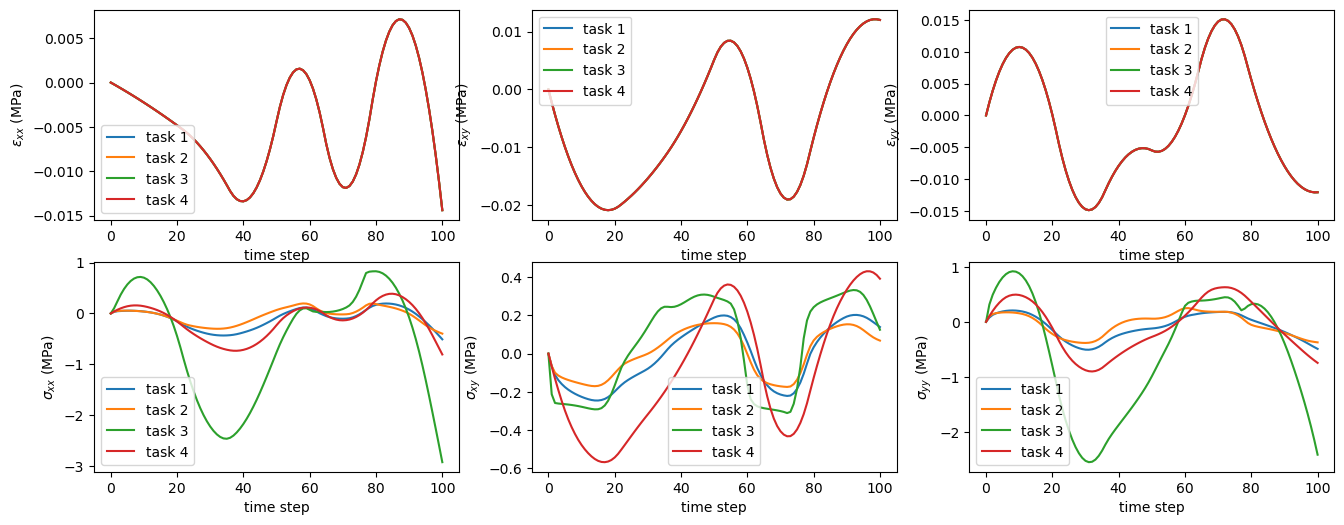

In [7]:
plot_path_dependent(task1_results=results_task_A,
                    task2_results=results_task_B,
                    task3_results=results_task_C,
                    task4_results=results_task_D)


## How to run it in the hpc cluster  

The whole process of data generation is configured by Hydra. The code structure is shown as follows

```
CDDM                                                                          
│    config.py  
│    config.yaml 
│    main.py 
│    pbsjob.sh
│    READNE.md 
|    cddm_data_generation.ipynb
``` 
---
According to the code structure, the ``config.py``, ``config.yaml``, ``main.py`` are the three major files to replicate the data generation process of CDDM in one shot, and ``pbsjob.sh`` is the file to run the whole design of experiment in the cluster.  There are two ways of running those simulations: (Note: the simulation is done by ABAQUS, so ABAQUS is needed for running those )
- run it at the terminal of your local machine  
>   ```python main.py``` 
- run it at the hpc cluster
> ```qsub pbsjob.sh``` 